# Introduksjon til bruk av Jupyter med Python
**Anne Kværnø**

23.02.2018


## Innledning

Velkommen til numerikkdelen av TMA4125 Matematikk 4N. 
I denne delen av kurset vil alt materiale foreligge i form av notater skrevet i Jupyter. Dette er en web-basert omgivelse som gjør det enkelt å skrive tekst og programmeringskode i et og samme dokument.  

Dere lærer ikke programmering i dette kurset, men det antas at dere er i stand til å lese og modifisere enkel kode. Noe kjennskap til Matlab/Octave eller Python er en forutsetning. I dette notatet er det en kort introduksjon til de viktigste konstruksjonene for bruk av Python. For dere som bare kan Matlab, ta en kikk på [NumPy for Matlab users](https://docs.scipy.org/doc/numpy-dev/user/numpy-for-matlab-users.html). 

Alle disse notatene kan lastes ned og kjøres lokalt, se [How to install and use Anaconda]( https://wiki.math.ntnu.no/anaconda/start).

### Bruk av Jupyternotater 

Et Jupyternotat er satt sammen av celler. Disse kan enten bestå av tekst (som denne), eller av kode, som vist under. Så fort du har kopiert notatet over til ditt eget domene, er du fri til å endre både tekst og kode. Imidlertid oppfordres du på det sterkeste til å la teksten stå, men eksperimentere med koden. Det er også  mulig å lage nye celler, med egne notater eller egen kode. 

Under finner du et eksempel på en celle med kode. Denne kjøres ved å trykke _shift+enter_. 

In [7]:
a = 2
b = 14
c = a*b
print(c)

28


Når du har kjørt en celle med kode er dataene bevart og kan brukes igjen. 

In [3]:
print(a, b)

2 14


In [4]:
a = 8

## Numeriske beregninger i Python:

Implementering av numeriske algoritmer behøver ikke være veldig komplisert, de krever stort sett følgende: 

* Funksjoner 
* Løkker, særlig for-løkker. 
* Matriser og vektorer. 
* Visualisering av resultater.

I dette notatet er det _veldig kort_ forklart hvordan disse brukes. 

Vi trenger to moduler:   
* [Numpy:](http://www.numpy.org) Arrays (matriser og vektorer), og de vanlige matematiske funksjonene. 
* [Matplotlib:](https://matplotlib.org) Grafer og figurer.  

I notatene i dette kurset, vil den aller første cellen med kode se omtrent ut som den under. Nødvendige moduler og funksjoner importeres og Jupyter gjøres klar for å vise plott i notatet. Denne cellen skal kjøres før noe annen kode i notatet. 

In [5]:
# Importer nødvendige moduler, og sett parametre for plotting. 
# Dette må alltid kjøres først!
%matplotlib inline    
from numpy import *               
from numpy.linalg import solve, norm  
from matplotlib.pyplot import *   

# De neste linjene setter parametre for plotting. 
# Parameterne her kan gjerne endres
newparams = {'figure.figsize': (8.0, 4.0), 'axes.grid': True,
             'lines.markersize': 8, 'lines.linewidth': 2,
             'font.size': 14}
rcParams.update(newparams)

Parameterne i `newparams` kan gjerne endres til du får et plott med skriftstørrelse og linjetykkelse du selv liker. Test det med følgende plott:

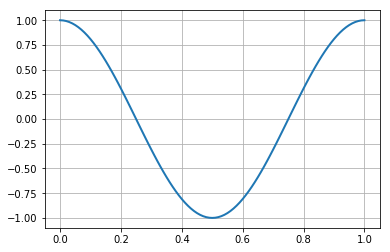

In [4]:
x = linspace(0,1,101)
plot(x, cos(2*pi*x));     # Bruk ; for å unngå tekst. 
                          # Trengs bare på siste linje i hver celle

### Numpy: 
Numpy håndterer vektorer og matriser som henholdsvis 1- og 2-dimensjonale arrays. I motsetning til Matlab, skilles det altså ikke mellom rad-vektorer og kolonne-vektorer. 

Følgende illustrer enkel bruk av lineær algebra i Python: La

$$ 
A = \begin{pmatrix} 1.4 & 2.2 & -1.0 \\ 1.6 & -2.7 & 1.2 \\ -3.2 & 1.2 &-1.8 \end{pmatrix}, 
\qquad 
\mathbf{y} = \begin{pmatrix} 1.0 \\ -2.0 \\ 3.0  \end{pmatrix}
$$


In [6]:
A = array([[1.4, 2.2, -1.0],        # A: Et 2-dimensjonalt array 
           [ 1.6, -2.7, 1.2],
           [ -3.2, 1.2, -1.8]])     
y = array([1.0, -2.0, 3.0])         # y: Et 1-dimensjonalt array
print('A = \n', A)
print('\ny = ', y)

A = 
 [[ 1.4  2.2 -1. ]
 [ 1.6 -2.7  1.2]
 [-3.2  1.2 -1.8]]

y =  [ 1. -2.  3.]


I Python starter indekseringen med 0, mens indekseringen i matematikk vanligvis starter med 1. 
Det betyr f.eks. at $ y_3 $ (i matematikk) er `y[2]` i Python, og $ a_{21} $ er `A[1,0]`.

In [7]:
print(A[1,0])
print(y[2])
print(A[:,-1])

1.6
3.0
[-1.   1.2 -1.8]


Hvis `a` og `b` er to arrays av samme størrelse, vil operasjonen `*` være et elementvis produkt. Tilsvarende betyr `a**p` at hvert enkelt element i `a`  opphøyes i `p`:

In [8]:
a = array([1, 2, 3])
b = array([3, 4, 5])
print('a*b = ', a*b)
print('a**2 = ', a**2)

a*b =  [ 3  8 15]
a**2 =  [1 4 9]


Og her følger et lite knippe nyttige funksjoner:
* `A@y` eller `dot(A,y)` : Matrise-vektor multiplikasjon. 
* `solve(A,b)` :  Løser et lineært ligningssystem $ A \mathbf{x} = \mathbf{b} $. 
* `ones(n)` : Array av lengde $ n $ med 1-ere. 
* `zeros(n)` : Array av lengde $ n $ med 0-ere. 
* `len(x)` : Lengden av et array.
* `shape(A)` : Størrelsen av et array. Returnerer $(n, m)$ hvis $A\in \mathbb{R}^{n\times m}$. 
* `eye(n)` : En $ n \times n$ identitetsmatrise.
* `linspace(a, b, n)` : Array med n likt fordelte punkter mellom a og b.

Test dem ut selv. 

In [9]:
x = linspace(-1, 1, 11)
print(x)
m,n = shape(A)
print(m,n)

[-1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8  1. ]
3 3


#### Normen til en vektor
<a name="norm"></a>
La $\mathbf{x}=[x_1,\cdots,x_2]\in \mathbb{R}^n$.  To vanlige uttrykk for lengden (eller normen) av $\mathbf{x}$ er 

$$
 \|\mathbf{x}\|_2 = \sqrt{\sum_{i=1}^n x_i^2}, \qquad \|\mathbf{x}\|_{\infty} = \max_i|x_i|. 
$$

In [10]:
x = array([1, -3, 2])
print( norm(x) )            # 2-normen
print( norm(x, inf) )       # max-normen

3.7416573867739413
3.0


### Matplotlib
La oss rett og slett demonstrere enkel bruk av Matplotlib ved hjelp av et eksempel: 

Plott funksjonene 

$$ f(x) = x^2 + 2x \qquad \text{og} \qquad g(x) = 2x\sin(2\pi x) $$

på intervallet $-1 \leq x \leq 1$. 

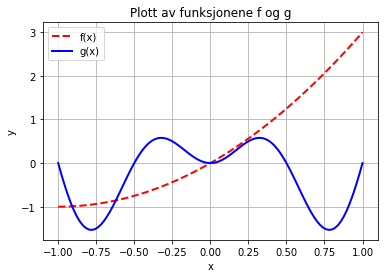

In [6]:
x = linspace(-1, 1, 101)      # Lager 'x-aksen'
f = x**2 + 2*x
g = 2*x*sin(2*pi*x)
plot(x, f, 'r--')             # Plott f, rød stiplet kurve
plot(x, g, 'b-')              # Plott g, blå heltrukken kurve 
xlabel('x')
ylabel('y')
title('Plott av funksjonene f og g')
legend(['f(x)', 'g(x)']);

### Løkker og funksjoner

Det finnes ikke noe `end`-type setning i Python. 
Innholdet i funksjoner eller kontrollstrukturer markeres med innrykk. Når innrykket er avsluttet, er funksjonen eller kontrollstrukturen avsluttet.

Nedenfor er for-løkker og funksjoner demonstrert med små eksempler. 

### for-løkker
En celle med ei  `for`-løkke kan f.eks. se slik ut: 

In [11]:
x = array([1.3, 4.6, 2.1, -5.8])
n = len(x)
print('n = ', n, '\n')
for i in range(n):
    print('i = {:2d}, x = {:6.2f}'.format(i, x[i]))    # Formattert utskrift
print('\nOg dette avslutter løkka')

n =  4 

i =  0, x =   1.30
i =  1, x =   4.60
i =  2, x =   2.10
i =  3, x =  -5.80

Og dette avslutter løkka


Legg merke til at konstruksjonen
`for i in range(n)` tilsvarer $i=0,1,\dotsc,n-1$. 

### Funksjoner

Kast en ball opp i lufta. Ignorer luftmotstand. Hvis utgangshastigheten er $v_0$ så vil ballens høyde og hastighet være gitt ved

\begin{align}
    y(t) &= v_0t - \frac{1}{2} g t^2 && \text{høyde} \\
    v(t) &= v_0 - gt && \text{hastighet}
\end{align}

hvor $g$ er gravitasjonskonstanten. I Python kan denne funksjonen skrives som:

In [9]:
def ball(t, v0=0, g=9.81):
    y = v0*t - 0.5*g*t**2
    v = v0 - g*t
    return y, v

Hvor $v_0$ og $g$ er satt som standardverdier (defaults). 

Her følger noen eksempler for bruk av denne funksjonen: 

Hva er hastighet og posisjon etter 2 sekunder, når utgangshastigheten er 0?

In [10]:
t = 2.0
y1, v1 = ball(t)        # etter 2 sekunder, ingen utgangshastighet
print('v0=',0.0,',  t=', t, ',  y=', y1, ',   v=', v1)

v0= 0.0 ,  t= 2.0 ,  y= -19.62 ,   v= -19.62


Hva er hastighet og posisjon etter 2 sekunder, når utgangshastigheten er 1 m/s? 

In [ ]:
v_start = 1.0
y2, v2 = ball(t, v0=v_start)  # etter 2 sekunder, med v0=1 m/s
print('v0=', v_start,',  t=', t, ',  y=', y2, ',   v=', v2)

Og hva er hastighet og posisjon etter 2 sekunder, hvis du repeterer siste eksperiment på månen? 

In [ ]:
y3, v3 = ball(t, v0=v_start, g=1.625)  
print('v0=', 1.0,',  t=', t, ',  y=', y3, ',   v=', v3, '  på månen.')

### Hjelp!

* Ta en titt på meny-linja i Jupyter, se om du finner det du trenger der. 
* For hjelp for en python-funksjon, skriv ?funksjonsnavn. 

In [ ]:
?linspace